# Capstone Project: Thalassemia alpha carrier/normal

### Importing statements

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics  import f1_score

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from plotting import plot_learning_curve, plot_validation_curve

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
data = pd.read_excel('twoalphas.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        147 non-null    object 
 1   hb         147 non-null    float64
 2   pcv        147 non-null    float64
 3   rbc        147 non-null    float64
 4   mcv        147 non-null    float64
 5   mch        146 non-null    float64
 6   mchc       147 non-null    float64
 7   rdw        147 non-null    float64
 8   wbc        147 non-null    float64
 9   neut       147 non-null    float64
 10  lymph      147 non-null    float64
 11  plt        147 non-null    int64  
 12  hba        147 non-null    float64
 13  hba2       147 non-null    float64
 14  hbf        147 non-null    float64
 15  phenotype  147 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory usage: 18.5+ KB


### Exploratory Data Analysis

In [4]:
data['mch'].fillna(data['mch'].mean(), inplace=True)

In [5]:
data

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,5.300000e+01,3.300000e+01,309,8.850000e+01,2.600000e+00,0.110000,alpha trait
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,4.940000e+01,4.310000e+01,687,8.780000e+01,2.400000e+00,0.900000,alpha trait
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,5.300000e+01,3.300000e+01,309,8.850000e+01,2.600000e+00,0.100000,silent carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,3.100000e+01,5.000000e+01,334,8.680000e+01,2.800000e+00,0.300000,silent carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,6.700000e+01,3.000000e+01,596,8.630000e+01,2.400000e+00,1.300000,silent carrier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,female,13.1,39.9,4.88,81.8,26.9,32.8,15.6,6.0,6.600000e+01,2.520000e+01,268,8.670000e+01,2.700000e+00,1.000000,silent carrier
143,female,10.4,33.3,4.93,67.6,21.1,31.2,14.8,8.9,4.447838e+09,4.552703e+09,295,8.800000e+01,2.400000e+00,0.500000,silent carrier
144,male,9.8,29.8,4.75,62.7,19.0,30.4,14.7,7.2,4.823448e+09,4.153793e+09,262,8.510000e+01,2.400000e+00,1.100000,alpha trait
145,male,11.2,37.2,5.43,68.5,20.6,30.1,15.1,12.0,1.350000e+01,7.680000e+01,277,8.652329e+09,2.588608e+09,0.769231,silent carrier


In [6]:
data['sex'].replace('male', 0, inplace=True,)
data['sex'].replace('female', 1, inplace=True,)

In [7]:
X = data.drop(columns=['phenotype'], axis= 1)
y = data.phenotype

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     147 non-null    int64  
 1   hb      147 non-null    float64
 2   pcv     147 non-null    float64
 3   rbc     147 non-null    float64
 4   mcv     147 non-null    float64
 5   mch     147 non-null    float64
 6   mchc    147 non-null    float64
 7   rdw     147 non-null    float64
 8   wbc     147 non-null    float64
 9   neut    147 non-null    float64
 10  lymph   147 non-null    float64
 11  plt     147 non-null    int64  
 12  hba     147 non-null    float64
 13  hba2    147 non-null    float64
 14  hbf     147 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 17.4 KB


In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 147 entries, 0 to 146
Series name: phenotype
Non-Null Count  Dtype 
--------------  ----- 
147 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


### Selecting algorithm

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [11]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)

In [12]:
sss = StratifiedShuffleSplit(n_splits = 100 , test_size=0.2) 

dummy_clf = DummyClassifier(strategy='stratified')
clf_rand = RandomForestClassifier()
clf_XGB = XGBClassifier()
clf_ext = ExtraTreesClassifier()
clf_ada = AdaBoostClassifier()
scores_f1 = [] 
classifiers=[dummy_clf, clf_rand, clf_XGB, clf_ext, clf_ada]
classifiers_l=['dummy_clf', 'clf_rand', 'clf_XGB', 'clf_ext', 'clf_ada']

In [13]:
for clf in classifiers:
    f1_ave_sco = np.average(cross_val_score(clf, X_train, y_train_le, cv = sss, scoring =  'f1_macro', ))
    scores_f1.append(f1_ave_sco)  

In [14]:
clf_scores = pd.DataFrame(scores_f1, classifiers_l, columns = ['f1_macro'])
clf_scores

,f1_macro
dummy_clf,0.500813
clf_rand,0.680433
clf_XGB,0.655339
clf_ext,0.696785
clf_ada,0.685826


### Improving the model

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':"Validation Curve with <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>"}, xlabel='max_depth', ylabel='f1_macro'>)

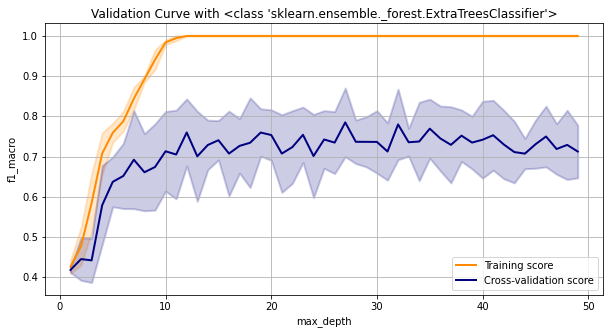

In [15]:
plot_validation_curve(clf_ext,  X_train, y_train, param_name = 'max_depth', param_range = np.arange(1,50,1), cv = StratifiedKFold(n_splits=5), scoring = 'f1_macro',n_jobs = -1)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':"Validation Curve with <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>"}, xlabel='min_samples_split', ylabel='f1_macro'>)

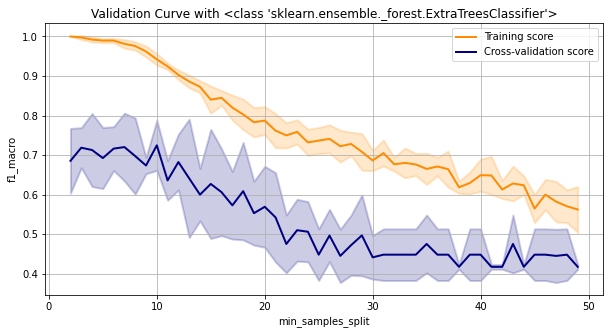

In [16]:
plot_validation_curve(clf_ext, X_train, y_train, param_name = 'min_samples_split', param_range = np.arange(1,50,1), cv = StratifiedKFold(n_splits=5), scoring = 'f1_macro', n_jobs = -1)

In [17]:
best_clf=ExtraTreesClassifier(max_depth = 8, min_samples_split=13)

### Fitting the models

In [18]:
dummy_clf.fit(X_train,y_train)
y_dummy_pred = dummy_clf.predict(X_test)

In [19]:
best_clf.fit(X_train,y_train)
y_best_pred = best_clf.predict(X_test)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>)

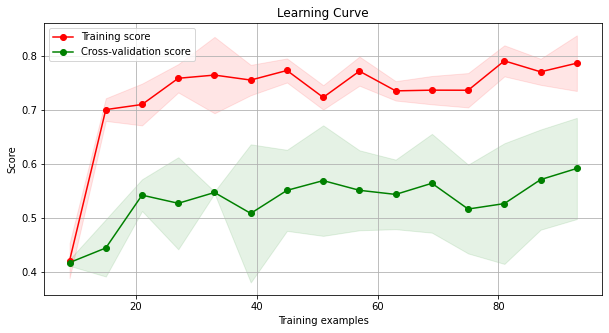

In [20]:
plot_learning_curve(best_clf, X_train, y_train, cv = StratifiedKFold(n_splits=5), train_sizes = np.linspace (0.1, 1.0, 15),scoring='f1_macro', n_jobs = -1)

### Evaluating the models

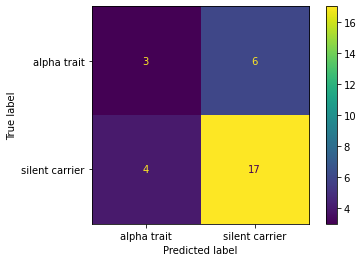

In [21]:
ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test) 

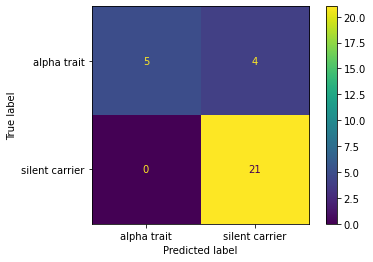

In [22]:
ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test) 

In [23]:
fbeta_score_dummy = fbeta_score(y_test, y_dummy_pred, average='macro', beta = 2)
fbeta_score_ext = fbeta_score(y_test, y_best_pred, average='macro', beta = 2)
f1_score_dummy = f1_score(y_test, y_dummy_pred, average='macro', )
f1_score_ext = f1_score(y_test, y_best_pred, average='macro', )
recall_dummy =recall_score(y_test, y_dummy_pred, average='macro', )
recall_ext = recall_score(y_test, y_best_pred, average='macro', )

In [24]:
final_scores = pd.DataFrame([['Dummy', recall_dummy, f1_score_dummy,fbeta_score_dummy],
['ExtraTreeClf', recall_ext, f1_score_ext, fbeta_score_ext]],
columns=['Classifier','Recall', 'f1_score', 'fbeta_score'])
final_scores = final_scores.set_index('Classifier')

In [25]:
final_scores

,Recall,f1_score,fbeta_score
Classifier,,,
Dummy,0.539683,0.534161,0.534795
ExtraTreeClf,0.777778,0.813665,0.786529


<AxesSubplot:xlabel='Classifier'>

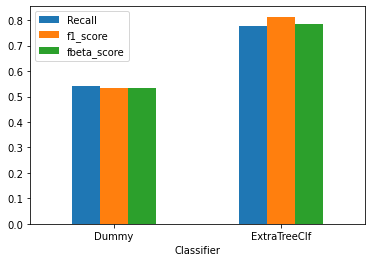

In [26]:
final_scores.plot(kind='bar', rot=0)

### Exploring extra posibilities: Feature selection and PCA

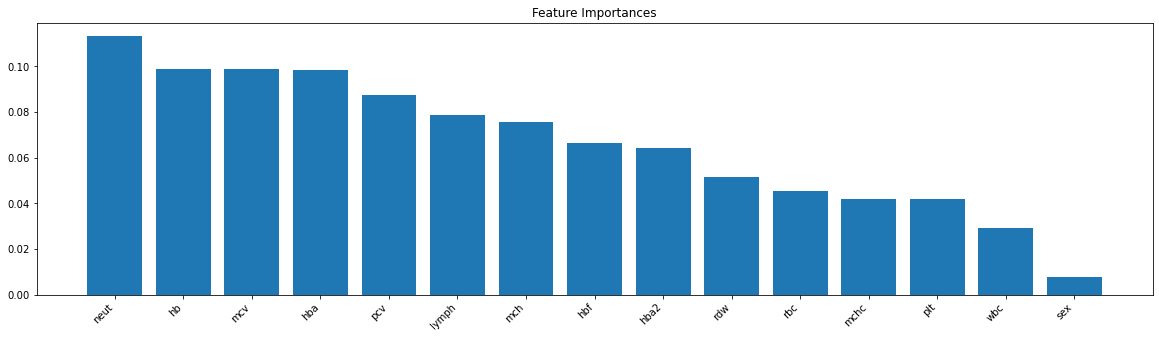

In [27]:
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

f_names = [X.columns[i] for i in indices]


fig, axes = plt.subplots(figsize=(20,5))
axes.set_title("Feature Importances")
axes.bar(range(X.shape[1]), importances[indices])


axes.set_xticks(range(X.shape[1]));
axes.set_xticklabels(f_names, rotation=45, ha='right');

In [28]:
sorted_features = pd.Series(best_clf.feature_importances_, index = X.columns)
sorted_features.sort_values(ascending=False).cumsum()
print(sorted_features.sort_values(ascending=False).cumsum()[:15])

neut     0.113299
hb       0.212141
mcv      0.310967
hba      0.409506
pcv      0.497160
lymph    0.575782
mch      0.651561
hbf      0.717881
hba2     0.782213
rdw      0.833731
rbc      0.879069
mchc     0.920912
plt      0.962629
wbc      0.992009
sex      1.000000
dtype: float64


In [29]:
print(sorted_features.sort_values(ascending=False).cumsum()[13])

0.9920086042603471


In [30]:
data2 = data.drop(columns='sex', axis = 1)

In [31]:
X2 = data2.drop(columns=['phenotype'], axis= 1)
y2 = data2.phenotype

In [32]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hb      147 non-null    float64
 1   pcv     147 non-null    float64
 2   rbc     147 non-null    float64
 3   mcv     147 non-null    float64
 4   mch     147 non-null    float64
 5   mchc    147 non-null    float64
 6   rdw     147 non-null    float64
 7   wbc     147 non-null    float64
 8   neut    147 non-null    float64
 9   lymph   147 non-null    float64
 10  plt     147 non-null    int64  
 11  hba     147 non-null    float64
 12  hba2    147 non-null    float64
 13  hbf     147 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 16.2 KB


In [33]:
y2.info()

<class 'pandas.core.series.Series'>
RangeIndex: 147 entries, 0 to 146
Series name: phenotype
Non-Null Count  Dtype 
--------------  ----- 
147 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [34]:
scaler = MinMaxScaler()

In [35]:
X2 = scaler.fit_transform(X2)
X2

array([[3.90243902e-01, 3.65142502e-09, 4.05442952e-10, ...,
        2.34737946e-09, 8.88508558e-10, 2.29166667e-02],
       [3.90243902e-01, 1.25430630e-09, 2.79770598e-10, ...,
        2.26722504e-09, 8.11246944e-10, 1.87500000e-01],
       [3.90243902e-01, 3.65142502e-09, 4.05442952e-10, ...,
        2.34737946e-09, 8.88508558e-10, 2.08333333e-02],
       ...,
       [2.68292683e-01, 2.14625745e-09, 3.50087273e-10, ...,
        1.95805799e-09, 8.11246944e-10, 2.29166667e-01],
       [4.39024390e-01, 4.20889448e-09, 4.51822036e-10, ...,
        9.90746316e-01, 1.00000000e+00, 1.60256410e-01],
       [8.29268293e-01, 6.24365804e-09, 4.92216721e-10, ...,
        9.90746316e-01, 1.00000000e+00, 1.60256410e-01]])

In [36]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size = 0.2)

In [37]:
best_clf.fit(X2,y2)
y2_pred = best_clf.predict(X2_test)

In [38]:
fbeta_score(y2_pred,y2_test,average='macro', beta = 2)

0.8193979933110367

In [39]:
pca_fit = PCA().fit(X2)

In [40]:
pca_fit.components_

array([[ 8.73865403e-02,  2.28167695e-01, -2.00610202e-03,
        -1.84847981e-03, -1.75438544e-03,  1.16303349e-02,
         1.95506726e-01,  3.83615225e-01,  5.15668491e-01,
         5.36878075e-01,  2.70189814e-01,  2.51797277e-01,
         2.52469447e-01, -2.18290096e-02],
       [ 2.48033526e-02, -3.03954033e-02,  2.33037546e-02,
        -3.31549971e-03, -3.20584905e-03,  1.23916903e-02,
        -2.12674577e-02, -1.83436095e-01, -2.19226975e-01,
        -2.15513366e-01, -8.37540462e-02,  6.57422570e-01,
         6.55380075e-01,  1.98298482e-02],
       [ 1.28282739e-01,  5.93630909e-01,  4.30120360e-02,
         5.49036098e-02,  5.47100126e-02,  2.71712254e-02,
         2.19538108e-01,  3.35569373e-01, -3.90785129e-01,
        -3.79699445e-01,  4.01123086e-01, -4.17856900e-02,
        -4.08806835e-02,  2.33346431e-02],
       [-1.29334998e-01, -5.59100807e-02,  1.00871449e-01,
         1.32262555e-01,  1.33002127e-01,  2.38204701e-01,
         8.70748277e-01, -3.22440494e-01,  3.

In [41]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    
    scree = pca.explained_variance_ratio_*100
    ax.bar(np.arange(len(scree))+1, scree)
    ax.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    ax.set_xlabel("Principal components")
    ax.set_ylabel("Percentage explained variance")
    ax.set_title("Scree plot")
    return ax

<AxesSubplot:title={'center':'Scree plot'}, xlabel='Principal components', ylabel='Percentage explained variance'>

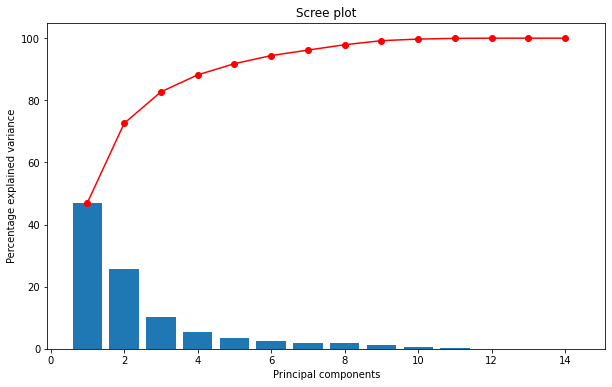

In [42]:
display_scree_plot(pca_fit)

In [43]:
X2_pca = pca_fit.transform(X2)

In [44]:
print("original shape:   ", X2.shape)
print("transformed shape:", X2_pca.shape)

original shape:    (147, 14)
transformed shape: (147, 14)


In [45]:
X2_pca

array([[-5.53006151e-01, -1.29264485e-01,  4.30135958e-02, ...,
        -4.19023389e-03, -9.09738192e-04, -2.37274726e-10],
       [-5.56598814e-01, -1.26000831e-01,  4.68541284e-02, ...,
        -4.18470868e-03, -4.97506831e-04,  1.68117835e-09],
       [-5.52960674e-01, -1.29305797e-01,  4.29649819e-02, ...,
        -4.19030392e-03, -9.14956314e-04, -2.36852892e-10],
       ...,
       [ 4.37339807e-01, -5.44056350e-01, -7.05033030e-01, ...,
         7.25512927e-02, -7.98294053e-04,  8.13864430e-11],
       [-4.98047134e-02,  1.18138792e+00, -2.98036408e-02, ...,
         8.01738218e-03, -7.60136938e-03, -4.73877396e-10],
       [-1.57026521e-02,  1.19106728e+00,  2.02579112e-02, ...,
         1.33988120e-02, -6.30978236e-03, -1.78183381e-10]])

In [46]:
variance_list = pca_fit.explained_variance_ratio_.cumsum()[2]
variance_list

0.827118858970444

### Ploting result to better visualization

C:\Users\HP-sobremesa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP-sobremesa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


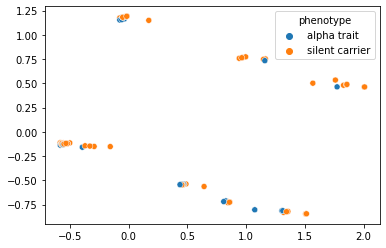

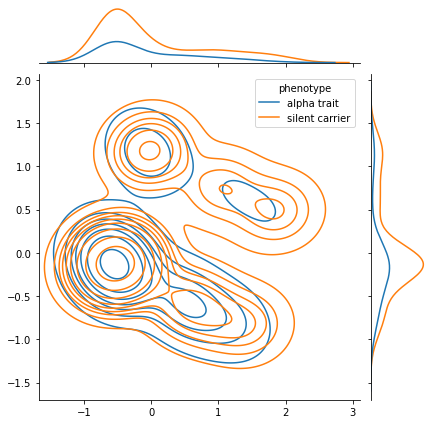

In [47]:
sns.scatterplot(X2_pca[:,0],X2_pca[:,1], hue=y2, )
sns.jointplot(X2_pca[:,0],X2_pca[:,1], hue=y2, kind= "kde")